In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("placement2.csv")

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package(in lpa)')

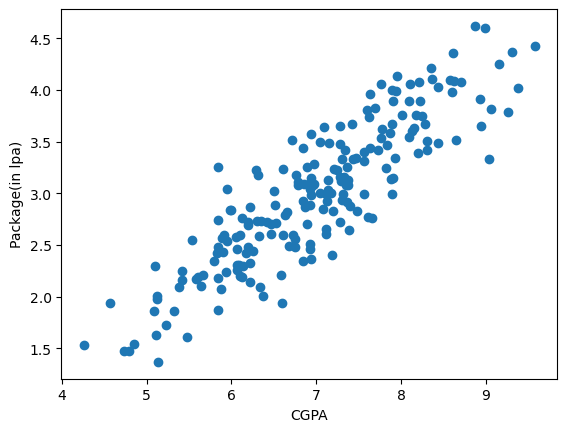

In [4]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel("CGPA")
plt.ylabel("Package(in lpa)")

In [5]:
X = df.iloc[:,0:1]
Y = df.iloc[:,-1]

In [6]:
Y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [9]:
lr = LinearRegression()

In [10]:
lr.fit(X_train,Y_train)

LinearRegression()

Text(0, 0.5, 'Package(in lpa)')

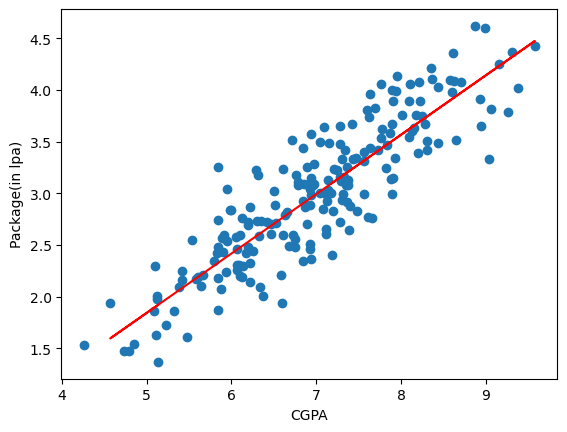

In [12]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel("CGPA")
plt.ylabel("Package(in lpa)")

In [13]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [16]:
Y_pred = lr.predict(X_test)

In [18]:
Y_test.values

array([2.79, 3.23, 3.26, 3.04, 3.34, 4.21, 2.94, 2.87, 2.99, 3.58, 1.63,
       2.08, 4.08, 2.21, 3.47, 3.64, 2.74, 3.08, 2.17, 2.99, 2.31, 2.35,
       3.4 , 3.08, 3.81, 2.19, 1.53, 2.89, 3.16, 2.48, 3.51, 2.98, 3.39,
       3.28, 2.73, 3.74, 2.6 , 3.13, 3.82, 3.15])

In [20]:
print("MAE : ", mean_absolute_error(Y_test,Y_pred))

MAE :  0.23150985393278373


In [22]:
print("MSE : ", mean_squared_error(Y_test,Y_pred))

MSE :  0.08417638361329657


In [25]:
print("RMSE : ", np.sqrt(mean_squared_error(Y_test,Y_pred)))

RMSE :  0.2901316659954521


In [26]:
print("R2 Score : ", r2_score(Y_test,Y_pred))

R2 Score :  0.7730984312051673


In [28]:
r2 =  r2_score(Y_test,Y_pred)

In [32]:
#Adjusted R2 score
X_test.shape

(40, 1)

In [33]:
1 -((1 - r2)*(40-1) / (40-1-1))

0.7671273372895138

In [46]:
new_df = df.copy()
new_df['random_feature'] = np.random.random(200)

new_df = new_df[['cgpa','random_feature','package']]
new_df.head()

,cgpa,random_feature,package
0,6.89,0.973042,3.26
1,5.12,0.783944,1.98
2,7.82,0.623904,3.25
3,7.42,0.998216,3.67
4,6.94,0.372283,3.57


Text(0, 0.5, 'Package(in lpa)')

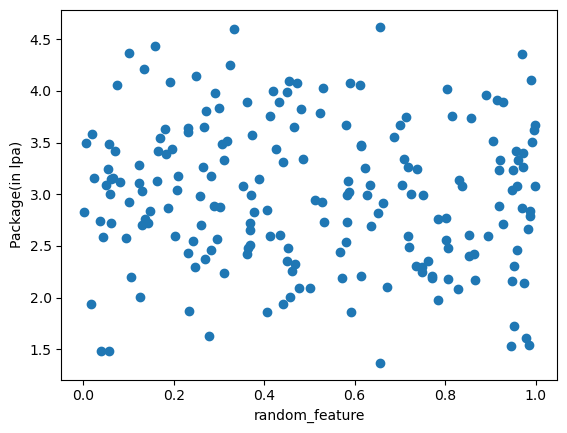

In [47]:
plt.scatter(new_df['random_feature'],new_df['package'])
plt.xlabel("random_feature")
plt.ylabel("Package(in lpa)")

In [48]:
X = new_df.iloc[:,0:2]
Y = new_df.iloc[:,-1]

In [49]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [50]:
lr = LinearRegression()

In [51]:
lr.fit(X_train,Y_train)

LinearRegression()

In [52]:
Y_pred = lr.predict(X_test)

In [53]:
print("R2 Score : ", r2_score(Y_test,Y_pred))

R2 Score :  0.78176766420859


In [55]:
r2 =  r2_score(Y_test,Y_pred)

In [57]:
1 -((1 - r2)*(40-1) / (40-1-2))

0.7699713217333787